# H2 VISAS ANALYSIS

Exploring data on H2 visa applications, which are requests by companies to hire foreign workers for non-agricultural jobs within the United States. The U.S. Department of Labor releases this data as Excel (.XLS) files and BuzzFeed News has been tracking and hosting these datasets on Github. The dataset has data from fiscal year 2000 till 2016, this work will only take into account from fiscal year 2010 to 2016 (only goes to March 31st)

Data:
https://github.com/BuzzFeedNews/H-2-certification-data#standardized-data


# 1. Imports, load data, and quick look at it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import vincent
%matplotlib inline
plt.style.use('fivethirtyeight')

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# load data
h2visas_df = pd.read_csv(".\\datasets\\H-2-certification-decisions.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,8,9,14,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Number of columns/rows:")
print(h2visas_df.shape)
print("-------------------\n\nColumns:")
h2visas_df.columns

Number of columns/rows:
(213155, 22)
-------------------

Columns:


Index(['case_no', 'visa_type', 'fy', 'last_event_date', 'case_status',
       'n_requested', 'n_certified', 'is_certified',
       'certification_begin_date', 'certification_end_date', 'job_title',
       'employer_name', 'employer_state', 'employer_city',
       'employer_address_1', 'employer_address_2', 'employer_postal_code',
       'worksite_state', 'worksite_city', 'agent_name', 'organization_flag',
       'is_duplicate'],
      dtype='object')

In [4]:
h2visas_df.head()

case_no visa_type    fy last_event_date           case_status  n_requested  \
0  9455254      H-2B  2000      1999-10-01     DENIED, TEMPORARY          1.0   
1  8222219      H-2B  2000      1999-10-04  CERTIFIED, TEMPORARY          2.0   
2  8222168      H-2B  2000      1999-10-04  CERTIFIED, TEMPORARY          2.0   
3  8222169      H-2B  2000      1999-10-04  CERTIFIED, TEMPORARY          5.0   
4  8222170      H-2B  2000      1999-10-04  CERTIFIED, TEMPORARY         40.0   

   n_certified is_certified certification_begin_date certification_end_date  \
0            0        False                      NaN                    NaN   
1            2         True                      NaN                    NaN   
2            2         True                      NaN                    NaN   
3            5         True                      NaN                    NaN   
4           40         True                      NaN                    NaN   

      ...      employer_state      employer_city employer_address_1  \
0     ...                  CA        LOS ANGELES                NaN   
1     ...                  CO       BEAVER CREEK                NaN   
2     ...                  CO  MT. CRESTED BUTTE                NaN   
3     ...                  CO  MT. CRESTED BUTTE                NaN   
4     ...                  CO  MT. CRESTED BUTTE                NaN   

  employer_address_2 employer_postal_code worksite_state worksite_city  \
0                NaN                  NaN            NaN           NaN   
1                NaN                  NaN            NaN           NaN   
2                NaN                  NaN            NaN           NaN   
3                NaN                  NaN            NaN           NaN   
4                NaN                  NaN            NaN           NaN   

  agent_name organization_flag is_duplicate  
0        NaN               NaN          NaN  
1        NaN               NaN          NaN  
2        NaN               NaN          NaN  
3        NaN               NaN          NaN  
4        NaN               NaN          NaN  

[5 rows x 22 columns]

In [5]:
#column types
h2visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213155 entries, 0 to 213154
Data columns (total 22 columns):
case_no                     213155 non-null object
visa_type                   213155 non-null object
fy                          213155 non-null int64
last_event_date             205686 non-null object
case_status                 213155 non-null object
n_requested                 141512 non-null float64
n_certified                 213155 non-null int64
is_certified                213155 non-null bool
certification_begin_date    155351 non-null object
certification_end_date      155342 non-null object
job_title                   212671 non-null object
employer_name               213133 non-null object
employer_state              213029 non-null object
employer_city               213076 non-null object
employer_address_1          169205 non-null object
employer_address_2          21596 non-null object
employer_postal_code        168879 non-null object
worksite_state            

In [6]:
# number of nulls per column
h2visas_df.isnull().sum()

case_no                          0
visa_type                        0
fy                               0
last_event_date               7469
case_status                      0
n_requested                  71643
n_certified                      0
is_certified                     0
certification_begin_date     57804
certification_end_date       57813
job_title                      484
employer_name                   22
employer_state                 126
employer_city                   79
employer_address_1           43950
employer_address_2          191559
employer_postal_code         44276
worksite_state               63071
worksite_city               131175
agent_name                   57221
organization_flag           166033
is_duplicate                137871
dtype: int64

Most NaN values are at the beginning of the data. Analyzing years from 2010 on will help to get rid of these. Let's visualize the nulls

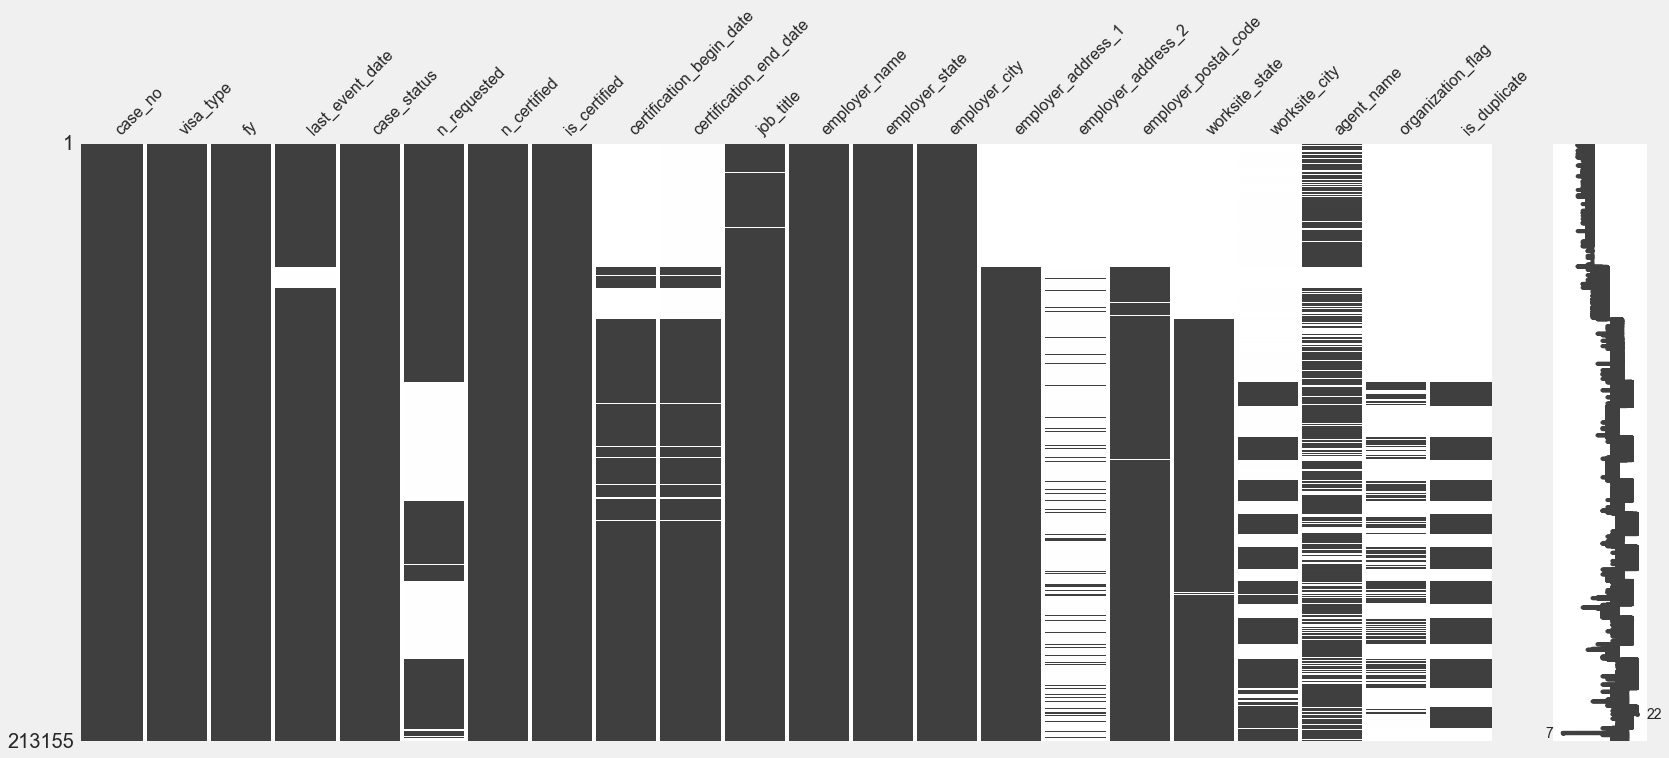

In [7]:
msno.matrix(h2visas_df)

# 2. Delete rows I don't need for my analysis
I'll work from data starting October 1, 2010 to March 31, 2016. Which means fiscal year of 2011 in advance. Let's get rid of the fy we don't need

In [8]:
h2visas_df = h2visas_df[h2visas_df["fy"] >= 2011]

Let's check the NaN values again:

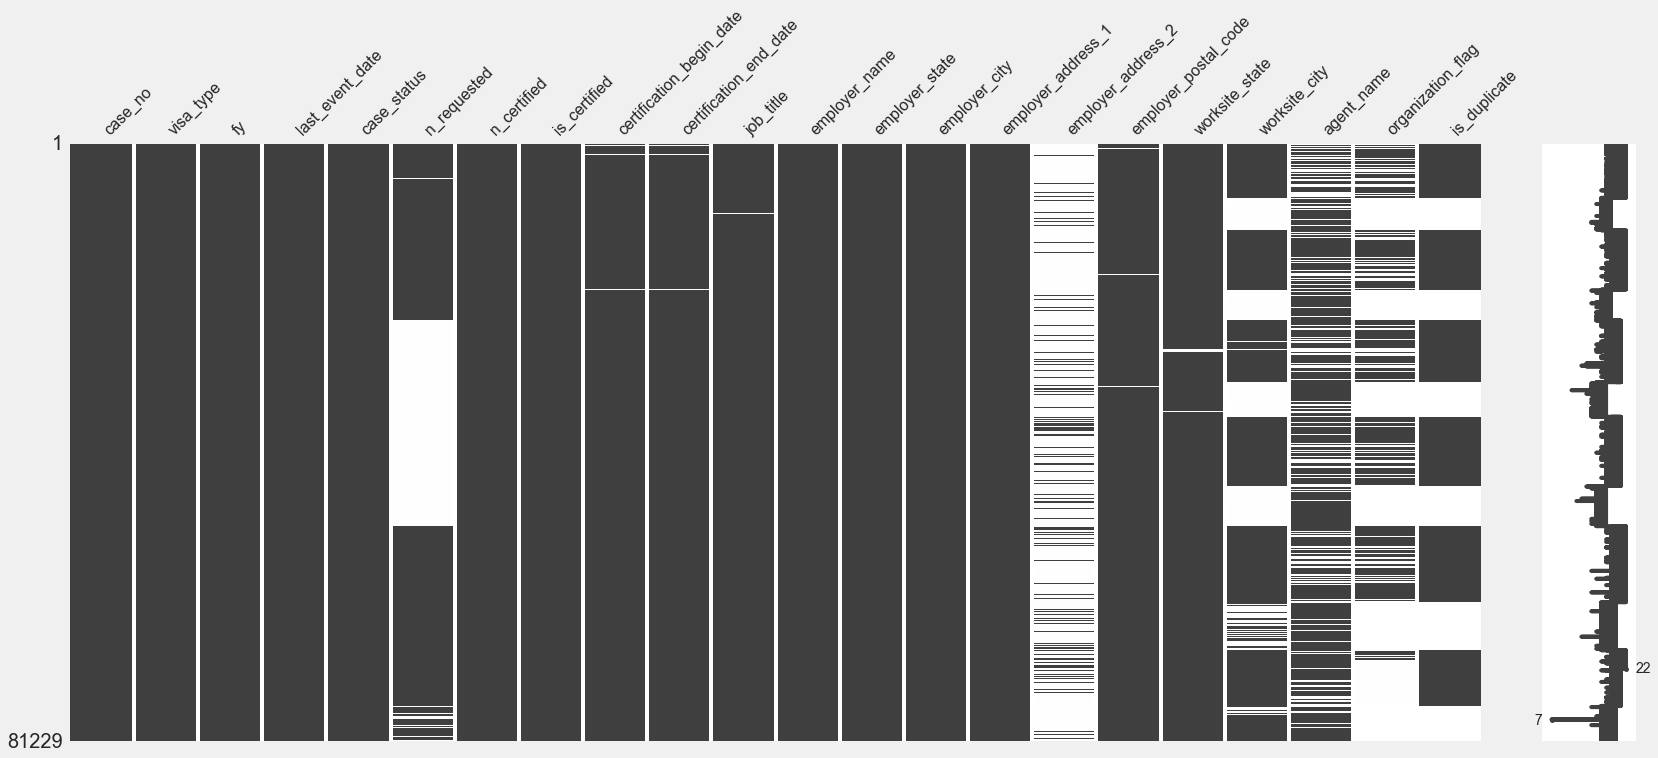

In [9]:
msno.matrix(h2visas_df)

# 3. Duplicates
First thing I want to do is to eliminate duplicates so I don't work with them in the next steps

The data shows that all duplicates for visa H-2A are marked as is_duplicate == True. H-2B Visas are not marked as duplicates

In [10]:
h2visas_df['visa_type'][h2visas_df['is_duplicate'] == True].value_counts()

H-2A    19314
Name: visa_type, dtype: int64

But there area also H-2B duplicate case numbers, even though the number is really small:

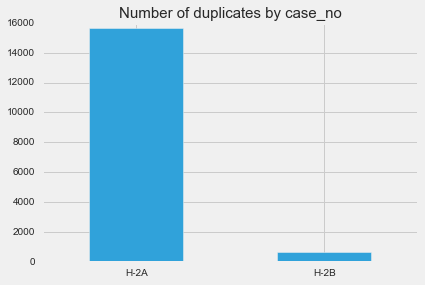

In [11]:
h2visas_df['visa_type'][h2visas_df.duplicated('case_no')].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.title("Number of duplicates by case_no",size=15)

After analyzing how H-2A duplicates I found out that on a set of duplicates the one with is_duplicate == false is the aggregation of all duplicates. So it is the one to keep, see example below (1 random example taken):

In [12]:
cols_to_check = ['n_certified','n_requested','visa_type','is_duplicate']
h2a_dup = h2visas_df['case_no'][(h2visas_df['is_duplicate'] == True) & (h2visas_df['visa_type']=='H-2A')].value_counts()
h2visas_df[cols_to_check][h2visas_df['case_no'] == h2a_dup.index[400]]

n_certified  n_requested visa_type is_duplicate
177797           42          NaN      H-2A        False
177798           16          NaN      H-2A         True
177799           16          NaN      H-2A         True
177800            5          NaN      H-2A         True
177801            5          NaN      H-2A         True

**I'll remove all duplicates if ... **
- Case number is the same.
- Visa type is the same.

**I'll keep one row:
- If H-2A, I'll keep visa with is_duplicate == false as explained above
- If H-2B, I'll keep visa with biggest n_requested
- In case of doubt I'll keep visa with biggest n_requested
- If all n_requested are null I'll keep biggest n_certified

In [13]:
# get rows that have more than one entry for case_no
duplicates = h2visas_df['case_no'].value_counts()[h2visas_df['case_no'].value_counts() > 1].index

for dup in duplicates:
    # get all duplicates for each case
    duplicate_case = h2visas_df[cols_to_check][h2visas_df['case_no']==dup]
    #check visa_type is the same    
    if len(duplicate_case['visa_type'].unique()) == 1:
        is_duplicate = duplicate_case['is_duplicate'].value_counts()
        # check how is_duplicate looks like
        if len(is_duplicate) <= 1: #If all true or all false try with n_requested or n_certified (keep the biggest)
            if len(duplicate_case['n_requested'].value_counts()) == 0:
                duplicate_case.drop(duplicate_case['n_certified'].idxmax(),inplace=True)
            else:
                duplicate_case.drop(duplicate_case['n_requested'].idxmax(),inplace=True)
        elif len(is_duplicate) > 1: #keep the only one that it's false
            duplicate_case.drop(duplicate_case[duplicate_case["is_duplicate"]==False].index[0], inplace=True)
        else:
            print("-Error: "+ dup)
        h2visas_df.drop(duplicate_case.index,inplace=True)
    else:
        print("Error: "+ dup)

Let's check if there are any duplicates left:

In [14]:
if len(h2visas_df['visa_type'][h2visas_df.duplicated('case_no')]) == 0:
    print("No duplicates")
else:
    print(h2visas_df['visa_type'][h2visas_df.duplicated('case_no')])

No duplicates


# 4. Check columns and clean data:


# VISA TYPE

In [17]:
print('Number of nulls:')
h2visas_df.visa_type.isnull().sum()

Number of nulls:


0

H-2A    35461
H-2B    29499
Name: visa_type, dtype: int64


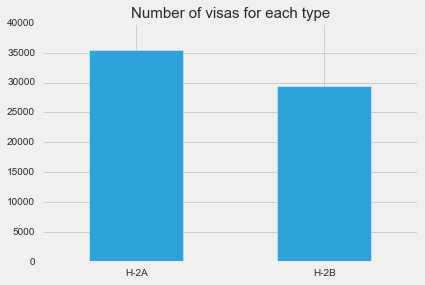

In [18]:
print(h2visas_df["visa_type"].value_counts())
h2visas_df["visa_type"].value_counts().plot(kind='bar')
plt.title("Number of visas for each type", size=15)
plt.xticks(rotation='horizontal')
plt.show()

#  Case status & is_certified
There are many case status. I will simplify them into 5 different status (Cerfified, In_progress, Denied, Expired, and Withdrawn ) 

In [19]:
#case_status counts
h2visas_df["case_status"].value_counts()

CERTIFIED - FULL                                        14799
CERTIFICATION                                           14515
DETERMINATION ISSUED - CERTIFICATION                    13557
CERTIFIED                                                8166
DENIED                                                   3720
PARTIAL CERTIFIED                                        3193
WITHDRAWN                                                2043
PARTIAL CERTIFICATION                                    1954
DETERMINATION ISSUED - CERTIFICATION EXPIRED              905
CERTIFIED - PARTIAL                                       766
DETERMINATION ISSUED - DENIED                             364
DETERMINATION ISSUED - WITHDRAWN                          338
CERTIFICATION EXPIRED                                     320
DETERMINATION ISSUED - PARTIAL CERTIFICATION              212
PARTIAL CERTIFICATION EXPIRED                              75
DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED       33
Name: ca

In [20]:
Certified = ['CERTIFIED - FULL','CERTIFIED','CERTIFIED, TEMPORARY','DETERMINATION ISSUED - CERTIFICATION','CERTIFICATION',]
Partial = ['PARTIAL CERTIFIED','CERTIFIED - PARTIAL','PARTIAL CERTIFICATION','DETERMINATION ISSUED - PARTIAL CERTIFICATION']
Denied = ['DENIED','DENIED, TEMPORARY','DETERMINATION ISSUED - DENIED','REDUCTION IN RECRUITMENT DENIED','NOF ISSUED','INCOMPLETE']
In_progress = ['RECEIVED REGIONAL OFFICE','RECEIVED','REMAND TO SWA','REMAND ISSUED TO EMPLOYER','REMAND ISSUED TO STATE','FINAL REVIEW','DATA REVIEW','RETURNED BY EMP AFTER REMAND','MODIFICATION']
Withdrawn = ['WITHDRAWN','DETERMINATION ISSUED - WITHDRAWN']
Expired = ['PARTIAL CERTIFICATION EXPIRED','DETERMINATION ISSUED - CERTIFICATION EXPIRED','CERTIFICATION EXPIRED','DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED']

def classify_status(status):
    new_status = status
    if status in Certified:
        new_status = 'Certified'
    elif status in Partial:
        new_status = 'Partial'
    elif status in Denied:
        new_status = 'Denied'
    elif status in In_progress:
        new_status = 'In_progress'
    elif status in Withdrawn:
        new_status = 'Withdrawn'
    elif status in Expired:
        new_status = 'Expired'
    return new_status

h2visas_df["case_status_sum"] = h2visas_df["case_status"].map(lambda x: classify_status(x))
print("New classification:")
h2visas_df["case_status_sum"].value_counts()

New classification:


Certified    51037
Partial       6125
Denied        4084
Withdrawn     2381
Expired       1333
Name: case_status_sum, dtype: int64

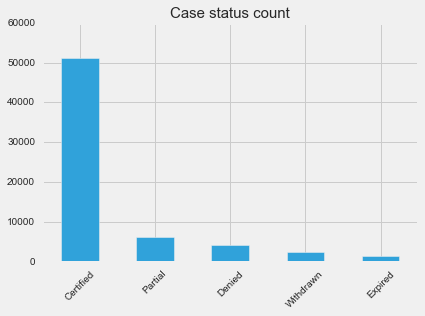

In [21]:
h2visas_df["case_status_sum"].value_counts().plot(kind='bar')
plt.title("Case status count", size=15)
plt.xticks(rotation=45)
plt.show()

In the following output we see that is_certified column contains partial and expired applications

In [22]:
print(" -------------- is certified ------------ ")
print(h2visas_df["case_status_sum"][h2visas_df["is_certified"] == True].value_counts())
print(" \n-------------- is NOT certified --------- ")
print(h2visas_df["case_status_sum"][h2visas_df["is_certified"] == False].value_counts())

 -------------- is certified ------------ 
Certified    51037
Partial       6125
Expired       1333
Name: case_status_sum, dtype: int64
 
-------------- is NOT certified --------- 
Denied       4084
Withdrawn    2381
Name: case_status_sum, dtype: int64


I'll remove is_certified column and case_status afterwards

# n_requested & n_certified

In [23]:
#Nulls
print("Number of NaN:")
print("n_requested: " ,h2visas_df.isnull().sum().loc['n_requested'])
print("n_certified: " , h2visas_df.isnull().sum().loc['n_certified'])

Number of NaN:
n_requested:  23660
n_certified:  0


Let's check the distribution for each kind of VISA

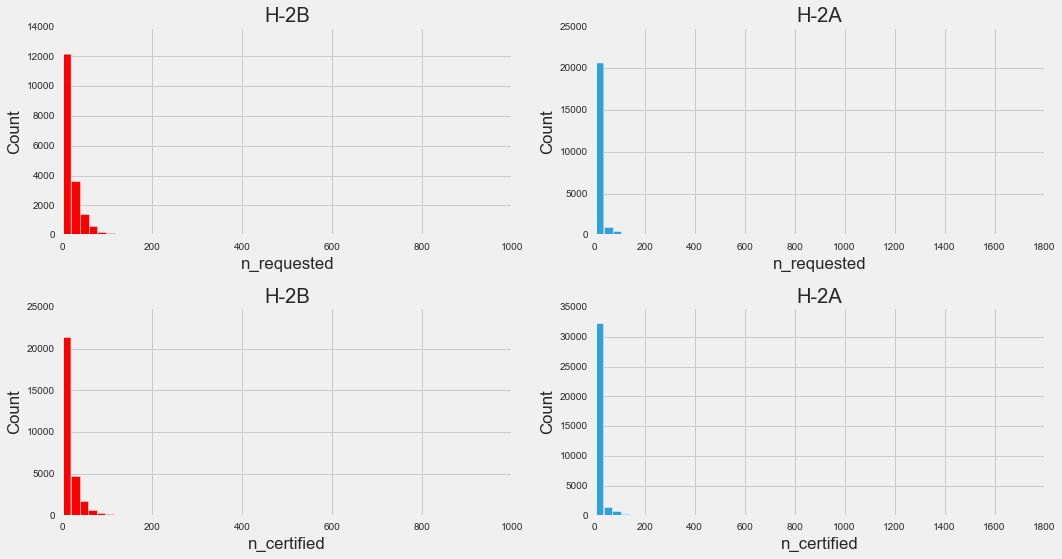

In [24]:
# show histogram of n_requested and n_certified under 150 for both types of visas
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((2,2), (0, 0))
ax2 = plt.subplot2grid((2,2), (0, 1))
ax3 = plt.subplot2grid((2,2), (1, 0))
ax4 = plt.subplot2grid((2,2), (1, 1))
ax1.set(xlabel='n_requested' , ylabel='Count', title='H-2B')
ax2.set(xlabel='n_requested' , ylabel='Count', title='H-2A')
ax3.set(xlabel='n_certified' , ylabel='Count', title='H-2B')
ax4.set(xlabel='n_certified' , ylabel='Count', title='H-2A')
ax1.hist(h2visas_df.n_requested[h2visas_df.visa_type == 'H-2B'].dropna(),bins=50,color='r')
ax2.hist(h2visas_df.n_requested[h2visas_df.visa_type == 'H-2A'].dropna(),bins=50) 
ax3.hist(h2visas_df.n_certified[h2visas_df.visa_type == 'H-2B'],bins=50,color='r')
ax4.hist(h2visas_df.n_certified[h2visas_df.visa_type == 'H-2A'],bins=50) 
plt.tight_layout()
plt.show()

As we can see there are some outliers. Let's zoom in to where most of the data is:

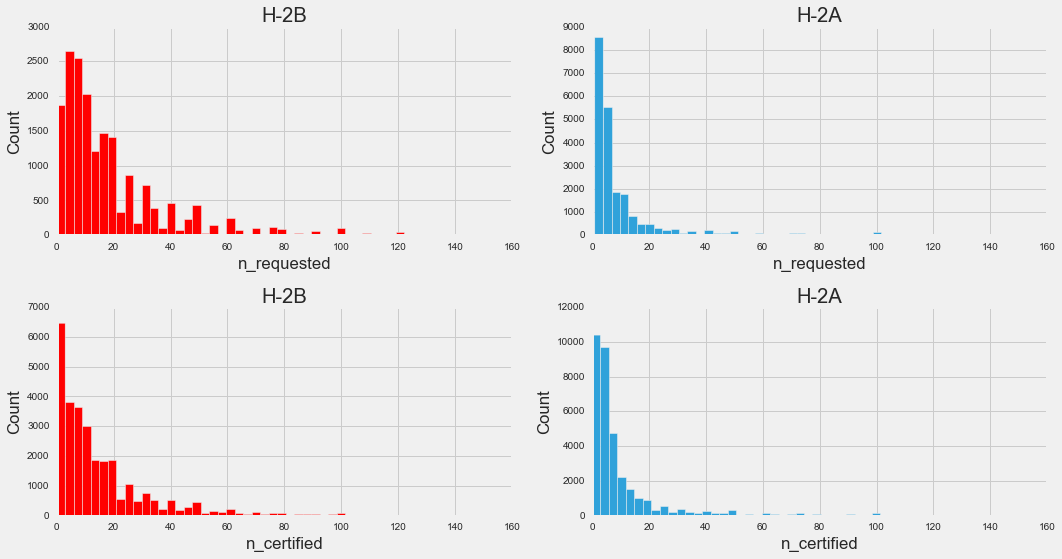

In [25]:
# show histogram of n_requested and n_certified under 150 for both types of visas
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((2,2), (0, 0))
ax2 = plt.subplot2grid((2,2), (0, 1))
ax3 = plt.subplot2grid((2,2), (1, 0))
ax4 = plt.subplot2grid((2,2), (1, 1))
ax1.set(xlabel='n_requested' , ylabel='Count', title='H-2B')
ax2.set(xlabel='n_requested' , ylabel='Count', title='H-2A')
ax3.set(xlabel='n_certified' , ylabel='Count', title='H-2B')
ax4.set(xlabel='n_certified' , ylabel='Count', title='H-2A')
ax1.hist(h2visas_df.n_requested[(h2visas_df.visa_type == 'H-2B') & (h2visas_df.n_requested < 150)],bins=50,color='r')
ax2.hist(h2visas_df.n_requested[(h2visas_df.visa_type == 'H-2A') & (h2visas_df.n_requested < 150)],bins=50) 
ax3.hist(h2visas_df.n_certified[(h2visas_df.visa_type == 'H-2B') & (h2visas_df.n_certified < 150)],bins=50,color='r')
ax4.hist(h2visas_df.n_certified[(h2visas_df.visa_type == 'H-2A') & (h2visas_df.n_certified < 150)],bins=50) 
plt.tight_layout()
plt.show()

The number of outliers is not that big if we compare them to the size of the data set. Based on the histograms I consider outliers those over 150

In [26]:
print('number of n_request over 150:')
print(len(h2visas_df[h2visas_df.n_requested > 150]))
print('number of n_certified over 150:')
print(len(h2visas_df[h2visas_df.n_certified > 150]))

number of n_request over 150:
533
number of n_certified over 150:
768


Checking some of them. They seem legit so I'll leave them. I could do further reasearch on this though. Here is one as an example

In [28]:
h2visas_df[h2visas_df.n_requested == 1714.0]

case_no visa_type    fy last_event_date  \
190718  H-300-15078-186809      H-2A  2015      2015-04-27   

                                 case_status  n_requested  n_certified  \
190718  DETERMINATION ISSUED - CERTIFICATION       1714.0         1714   

       is_certified certification_begin_date certification_end_date  \
190718         True               2015-05-20             2015-11-05   

             ...       employer_city           employer_address_1  \
190718       ...               LACEY  8830 TALLON LANE NE SUITE C   

       employer_address_2 employer_postal_code worksite_state worksite_city  \
190718                NaN                98516             WA      BREWSTER   

       agent_name                         organization_flag is_duplicate  \
190718        NaN  Association - Joint Employer (H-2A Only)        False   

       case_status_sum  
190718       Certified  

[1 rows x 23 columns]

There are a few cases were n_certified is bigger than n_requested. This is wrong.

In [29]:
h2visas_df[['visa_type','fy','case_status_sum','n_requested','n_certified']][h2visas_df.n_certified > h2visas_df.n_requested]

visa_type    fy case_status_sum  n_requested  n_certified
151531      H-2A  2012       Certified          9.0           19
191287      H-2A  2015         Partial        100.0          121
199495      H-2B  2015         Partial          1.0           14
210837      H-2B  2016       Certified          8.0           84
211604      H-2B  2016       Certified          6.0           12
212263      H-2B  2016         Partial          1.0            8
212714      H-2B  2016       Certified          2.0            3

As they are very few I'll fix them manually. I'll drop Partials and fix Certified

In [30]:
h2visas_df.loc[151531,"n_certified"] = 9
h2visas_df.drop(191287,inplace=True)
h2visas_df.drop(199495,inplace=True)
h2visas_df.loc[210837,"n_certified"] = 8
h2visas_df.loc[211604,"n_certified"] = 6
h2visas_df.drop(212263,inplace=True)
h2visas_df.loc[212714,"n_certified"] = 2

In [31]:
print("What values are in n_certified when n_requested is NaN? :")
h2visas_df.case_status_sum[h2visas_df.n_requested.isnull()].value_counts()

What values are in n_certified when n_requested is NaN? :


Certified    18010
Partial       1933
Denied        1415
Expired       1300
Withdrawn     1002
Name: case_status_sum, dtype: int64

I can fix n_requested for the ones that are certified because I know that all visas requested were granted, so I'll copy the value of n_certified to n_requested. 

In [32]:
new_values = h2visas_df.n_certified[(h2visas_df.case_status_sum == 'Certified') & (h2visas_df.n_requested.isnull())]
h2visas_df.n_requested[(h2visas_df.case_status_sum == 'Certified') & (h2visas_df.n_requested.isnull())]
h2visas_df.loc[new_values.index,'n_requested']= new_values

I can't do nothing for the rest so I'll leave the as they are:

In [33]:
h2visas_df.case_status_sum[h2visas_df.n_requested.isnull()].value_counts()

Partial      1933
Denied       1415
Expired      1300
Withdrawn    1002
Name: case_status_sum, dtype: int64

Some values have n_requested and n_certified iqual to 0, but all are Denied. So I'll set n_requested to NaN because I assume that you can not apply for 0 visas:

In [34]:
h2visas_df[['case_status_sum','n_requested','n_certified']][h2visas_df['n_requested'] == 0]

case_status_sum  n_requested  n_certified
194656          Denied          0.0            0
195474          Denied          0.0            0
197574          Denied          0.0            0
200707          Denied          0.0            0

In [35]:
h2visas_df.loc[(h2visas_df['n_requested'] == 0) & (h2visas_df['case_status_sum'] == 'Denied'),'n_requested'] = np.nan

# last_event_date

First, let's convert all date columns to datetime

In [36]:
#convert to datetime
h2visas_df["last_event_date"] = pd.to_datetime(h2visas_df["last_event_date"])
h2visas_df["certification_begin_date"] = pd.to_datetime(h2visas_df["certification_begin_date"])
h2visas_df["certification_end_date"] = pd.to_datetime(h2visas_df["certification_end_date"])

Check last_event_date for nulls:

In [37]:
print ("Nulls last_event_date:")
vc = h2visas_df["visa_type"][h2visas_df["last_event_date"].isnull()].value_counts()
if len(vc)==0:
    print("No Nulls")
else:
    print(vc)

Nulls last_event_date:
No Nulls


# certification_begin_date & certification_end_date

Check end Cerfication begin dates and Certification end dates

In [38]:
print ("Nulls certification_begin_date:")
vc = h2visas_df["visa_type"][h2visas_df["certification_begin_date"].isnull()].value_counts()
if len(vc)==0:
    print("No Nulls")
else:
    print(vc)

Nulls certification_begin_date:
H-2A    607
H-2B     24
Name: visa_type, dtype: int64


In [39]:
print ("Nulls certification_end_date:")
vc = h2visas_df["visa_type"][h2visas_df["certification_end_date"].isnull()].value_counts()
if len(vc)==0:
    print("No Nulls")
else:
    print(vc)

Nulls certification_end_date:
H-2A    608
H-2B     28
Name: visa_type, dtype: int64


Let's check the time in between certification_begin_date and certification_end_date in days:

(array([ -5000.,      0.,   5000.,  10000.,  15000.,  20000.,  25000.,
         30000.,  35000.]), <a list of 9 Text xticklabel objects>)

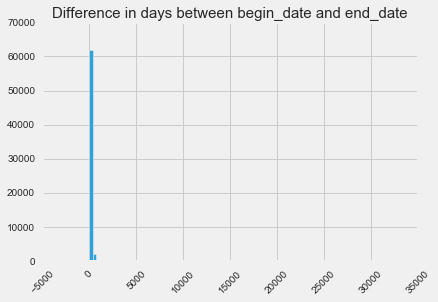

In [41]:
date_aux = h2visas_df.loc[(h2visas_df['certification_begin_date'].notnull()) & (h2visas_df['certification_end_date'].notnull()),['certification_begin_date','certification_end_date']]
diff = ((date_aux.certification_end_date - date_aux.certification_begin_date) / np.timedelta64(1, 'D')).astype(int)
diff.hist(bins=100)
plt.title("Difference in days between begin_date and end_date", size=15)
plt.xticks(rotation=45)

It seems there are many outliers, let's zoom in:

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.]),
 <a list of 9 Text xticklabel objects>)

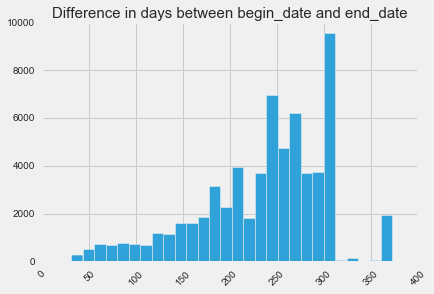

In [42]:
diff[(diff < 400) & (diff > 30)].hist(bins=30)
plt.title("Difference in days between begin_date and end_date", size=15)
plt.xticks(rotation=45)

The length of visas are usually less than a year. We could consider outliers the ones that have a difference greater than 400 or less than 30. How many are there?

In [43]:
len(diff[(diff > 400) | (diff < 30)])

433

Let's set these to NaN for the purpose of our analysis. Further analysis could be done here though.

In [44]:
h2visas_df.loc[diff[(diff > 400) | (diff<30)].index,'certification_end_date'] = np.nan
h2visas_df.loc[diff[(diff > 400) | (diff<30)].index,'certification_begin_date'] = np.nan

Let's check distributions of certification_end_date and certification_begin_date

In [45]:
print("certification_end_date:")
h2visas_df['certification_end_date'].dt.year.dropna().astype(int).value_counts().sort_index()

certification_end_date:


2006        1
2010       19
2011     7347
2012     9283
2013    10444
2014    11711
2015    13964
2016    10612
2017      507
Name: certification_end_date, dtype: int64

Now let's do the same with certification_begin_date

In [46]:
h2visas_df['certification_begin_date'].dt.year.dropna().astype(int).value_counts().sort_index()

2005        1
2009        1
2010      672
2011     8859
2012     9434
2013    10578
2014    12195
2015    14100
2016     8052
2017        1
Name: certification_begin_date, dtype: int64

Ploting the results

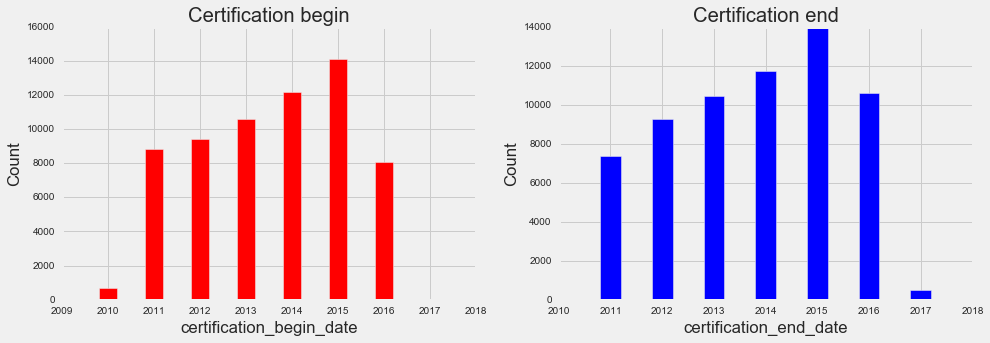

In [52]:
begin = h2visas_df['certification_begin_date'].dt.year.dropna().astype(int).value_counts().sort_index()
end = h2visas_df['certification_end_date'].dt.year.dropna().astype(int).value_counts().sort_index()

fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1))
ax1.set(xlabel='certification_begin_date' , ylabel='Count', title='Certification begin')
ax2.set(xlabel='certification_end_date' , ylabel='Count', title='Certification end')
ax1.bar(begin.index[2:], begin.values[2:],width=0.4, color='r',align='center')
ax2.bar(end.index[2:], end.values[2:],width=0.4, color='b',align='center') 
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
plt.tight_layout()
plt.show()

# job_title

In [53]:
print('Number of nulls:')
h2visas_df.fy.isnull().sum()

Number of nulls:


0

In [54]:
print('How many job titles?:')
len(h2visas_df.job_title.value_counts())

How many job titles?:


5648

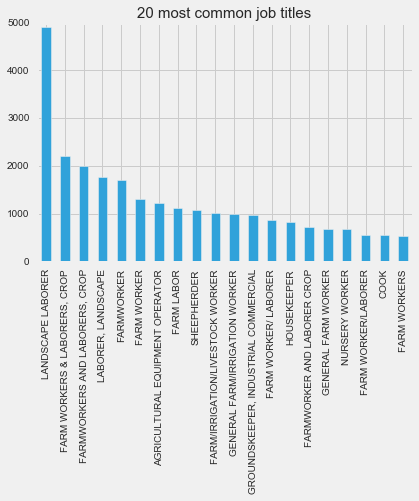

In [55]:
h2visas_df.job_title.value_counts()[:20].plot(kind='bar')
plt.title("20 most common job titles", size=15)
plt.show()

As we can see some names repeat themself. TODO: group jobs that have similar words

# organization_flag

In [56]:
print('Number of nulls:')
h2visas_df.organization_flag.isnull().sum()

Number of nulls:


33193

With so many nulls I'll probably get rid of this column

Association - Sole Employer (H-2A Only)         19
A                                              149
J                                              287
Association - Joint Employer (H-2A Only)       462
H-2A Labor Contractor or Job Contractor       2071
Association - Filing as Agent (H-2A Only)     3898
S                                            10740
Individual Employer                          14138
Name: organization_flag, dtype: int64


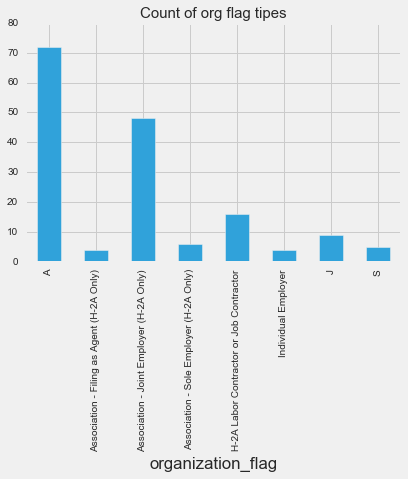

In [58]:
print(h2visas_df.organization_flag.value_counts().sort_values())
ofg = h2visas_df.groupby('organization_flag')
ofg.aggregate(np.median).n_requested.plot(kind='bar')
plt.title("Count of org flag tipes", size=15)
plt.show()

As we can see below the letters only happend in 2011 to 2013. Probably there was a change of the format sometime on 2013 and we can join them together. Further analysis needed.

In [59]:
h2visas_df.groupby('organization_flag')['fy'].value_counts().unstack(level=1,fill_value=0)

fy                                         2011  2012  2013  2014  2015  2016
organization_flag                                                            
A                                            55    88     6     0     0     0
Association - Filing as Agent (H-2A Only)     0     0  1001  1312  1440   145
Association - Joint Employer (H-2A Only)      0     0   114   144   194    10
Association - Sole Employer (H-2A Only)       0     0     3     6     7     3
H-2A Labor Contractor or Job Contractor       0     0   433   659   828   151
Individual Employer                           0     0  3636  4598  5093   811
J                                           118   159    10     0     0     0
S                                          4768  5208   764     0     0     0

# FY

In [60]:
print('Number of nulls:')
h2visas_df.fy.isnull().sum()

Number of nulls:


0

In [61]:
#counts
h2visas_df.fy.value_counts()

2015    14086
2014    12182
2013    10678
2012     9666
2011     9350
2016     8995
Name: fy, dtype: int64

# Employer state

In [62]:
print('Number of nulls:')
h2visas_df.employer_state.isnull().sum()

Number of nulls:


61

We can fix this by getting the state from the city

In [63]:
cities = h2visas_df['employer_city'][h2visas_df.employer_state.isnull()].value_counts()
cities

LETHBRIDGE           6
KELLIHER             5
ROSE VALLEY          5
LETHBRIDGE,          4
HODGEVILLE           4
MAGRATH              4
BURDETT              4
FOREMOST             4
TISDALE              2
VERMILION            2
FORT MACLEOD         2
ROULEAU              2
INNISFAIL            2
BRUCE                2
GALATI               1
CHATHAM              1
SEATTLE              1
DELORAINE            1
YORKTON              1
LYONS                1
WAINWRIGHT           1
MILLET               1
HODGEVILLE S0H2B0    1
Name: employer_city, dtype: int64

I'll use google maps to get the state, in case I can't find it I'll leave it as NaN.

In [64]:
import requests
dic_add = {} # to save what we find online
for city in cities.index:
    city = city.strip()
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address='+city+'NorthAmerica'
    try:        
        response = requests.get(url)
        resp_json_payload = response.json()
        dic_add[city]=(resp_json_payload['results'][0]['address_components'][2]['short_name'])
        if len(dic_add[city])>2:
            dic_add[city]=np.nan
    except:
        dic_add[city]=np.nan
          
#show results gotten from google maps
print("Results from quering google maps:")
for k,v in dic_add.items():
    print("Address: {0:20} Status: {1}".format(str(k),str(v)))

Results from quering google maps:
Address: TISDALE              Status: SK
Address: LETHBRIDGE,          Status: AB
Address: BURDETT              Status: nan
Address: ROSE VALLEY          Status: nan
Address: KELLIHER             Status: MN
Address: LYONS                Status: CO
Address: LETHBRIDGE           Status: AB
Address: VERMILION            Status: nan
Address: FORT MACLEOD         Status: AB
Address: HODGEVILLE           Status: SK
Address: GALATI               Status: nan
Address: MILLET               Status: nan
Address: WAINWRIGHT           Status: AB
Address: DELORAINE            Status: MB
Address: CHATHAM              Status: nan
Address: YORKTON              Status: SK
Address: SEATTLE              Status: WA
Address: MAGRATH              Status: AK
Address: FOREMOST             Status: AB
Address: ROULEAU              Status: SK
Address: INNISFAIL            Status: AB
Address: BRUCE                Status: MS
Address: HODGEVILLE S0H2B0    Status: SK


Using results to fix states:

In [65]:
print("Fixing .....")
for i in h2visas_df['employer_city'][h2visas_df.employer_state.isnull()].dropna().index:
    h2visas_df.loc[i,('employer_state')]=dic_add[str((h2visas_df.loc[i]['employer_city']).strip())]
print("... done fixing")
print("All fixed but: ")
h2visas_df.employer_state.isnull().sum()

Fixing .....
... done fixing
All fixed but: 


18

Let's check now if any of the states on the data doesn't exist

In [66]:
us_states = ['AL','AK','AZ','AR','CA','CO','CT','DC','DE','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
             'MN','MS','MO','MP','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT',
             'VI','VT','VA','WA','WV','WI','WY']
can_states = ['AB','BC','MB','NB','NL','NT','NS','NU','ON','PE','QC','SK','YT']

In [67]:
# what states are wrong?
wrong_states = []
for state in h2visas_df.employer_state.value_counts().index:
    if (state not in us_states) and (state not in can_states) and (state not in wrong_states):
        wrong_states.append(state)
print('Non existent states:')
wrong_states

Non existent states:


['NF']

Let's see if I can figure out which state is this by looking at the city

In [68]:
h2visas_df[['employer_state','employer_city','employer_address_1', 'employer_address_2', 'employer_postal_code','worksite_state', 'worksite_city']][h2visas_df['employer_state'] == 'NF']

employer_state employer_city employer_address_1 employer_address_2  \
136880             NF      MANTARIO             BOX 22                NaN   
136882             NF      MANTARIO             BOX 22                NaN   

       employer_postal_code worksite_state worksite_city  
136880                SOL2J             TX        HAMLIN  
136882                SOL2J             TX        HAMLIN

It looks the city is in Canada/Saskatchewan (SK).Let's fix it:

In [69]:
h2visas_df.loc[h2visas_df.employer_state == 'NF','employer_state'] = 'SK'

# Worksite state

We'll see if there are any wrong states and fix it

In [71]:
print('Number of nulls:')
h2visas_df.employer_state.isnull().sum()

Number of nulls:


18

In [72]:
# what states are wrong?
wrong_states = []
for state in h2visas_df.worksite_state.value_counts().index:
    if (state not in us_states) and (state not in can_states) and (state not in wrong_states):
        wrong_states.append(state)
print('Non existent states:')
wrong_states

Non existent states:


['KA', 'AS', 'MH', 'FM']

In [73]:
h2visas_df.worksite_state.value_counts().loc[wrong_states]

KA    3
AS    2
MH    1
FM    1
Name: worksite_state, dtype: int64

Let's check these rows and fix the states by looking up where the cities are manually:

In [79]:
h2visas_df.loc[h2visas_df.worksite_state == 'KA',['employer_city']]

employer_city
208936       KINSLEY
208937       KINSLEY
209562       WICHITA

In [80]:
h2visas_df.loc[h2visas_df.worksite_state == 'FM',['employer_city']]

employer_city
142253     GIBSONTON

In [81]:
h2visas_df.loc[h2visas_df.worksite_state == 'MH',['employer_city']]

employer_city
140545  MACKINAC ISLAND

In [85]:
print("fixing ....")
h2visas_df.loc[h2visas_df.worksite_state == 'KA',['worksite_state']] = 'KS'
h2visas_df.loc[h2visas_df.worksite_state == 'MH',['worksite_state']] = 'MI'
h2visas_df.loc[h2visas_df.worksite_state == 'FM',['worksite_state']] = 'FL'
print("\n.... done")

fixing ....

.... done


# 5. Delete columns I don't need for my analysis or are not useful (many Nulls)

In [86]:
h2visas_df.columns

Index(['case_no', 'visa_type', 'fy', 'last_event_date', 'case_status',
       'n_requested', 'n_certified', 'is_certified',
       'certification_begin_date', 'certification_end_date', 'job_title',
       'employer_name', 'employer_state', 'employer_city',
       'employer_address_1', 'employer_address_2', 'employer_postal_code',
       'worksite_state', 'worksite_city', 'agent_name', 'organization_flag',
       'is_duplicate', 'case_status_sum'],
      dtype='object')

In [87]:
h2visas_df.drop(['is_duplicate','agent_name','worksite_city','employer_address_2','case_status','organization_flag'], axis=1, inplace=True)

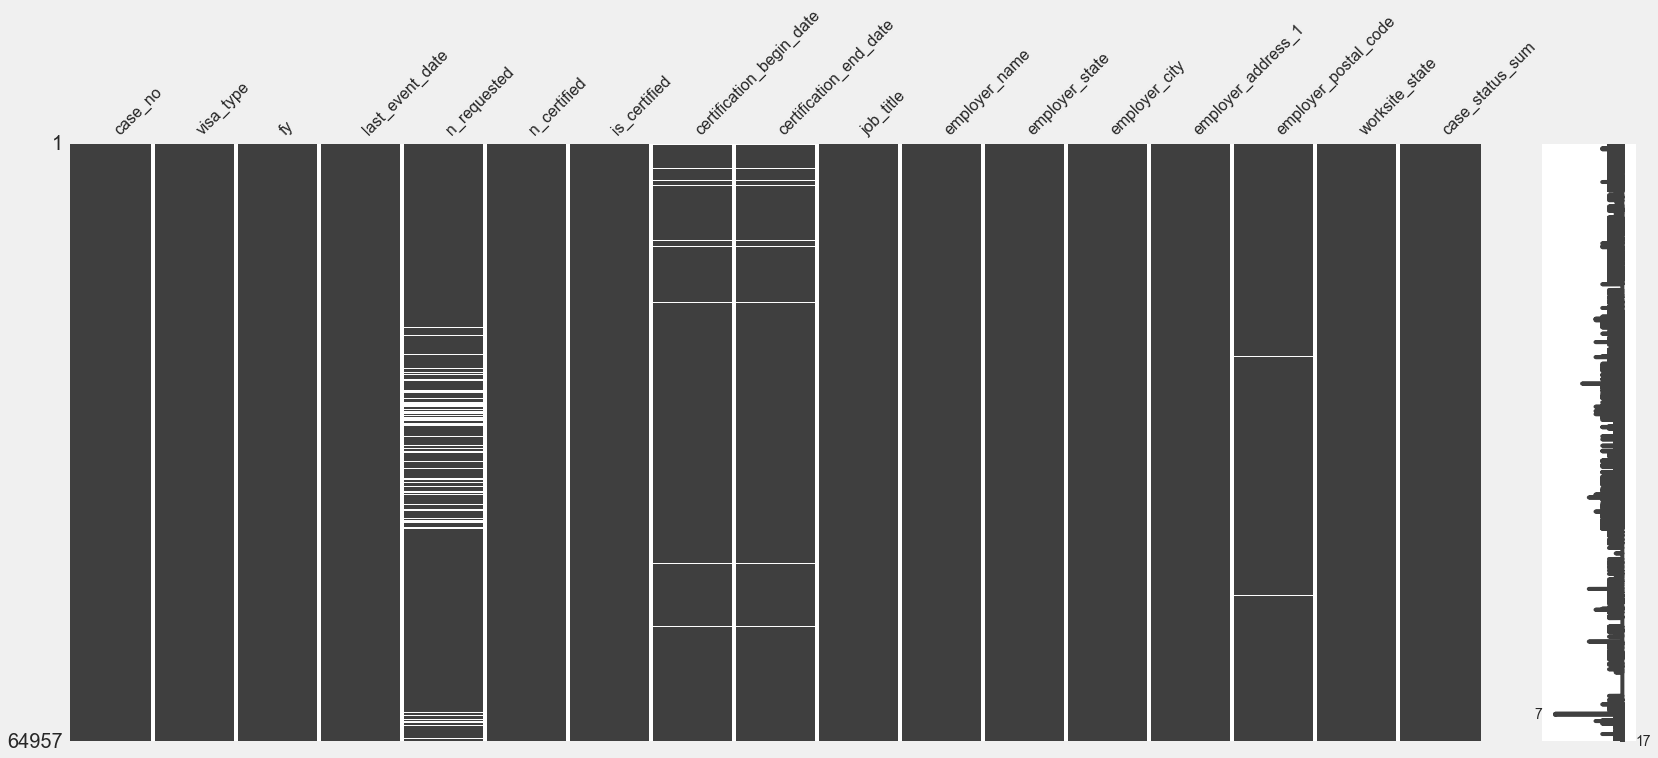

In [88]:
msno.matrix(h2visas_df)

I could also delete the few rows I have with nulls but they don't bother me right now so I'll leave that for now

# 6. Analysis
Stats for year 2016 are shown in the quantitative measures but not plotted because we only have data for 3 months of 2016 and the plot could be misleading.

# a) How application status have change over time

In [89]:
apgp = h2visas_df.groupby(['fy','case_status_sum'])['fy'].count()
to_plot = apgp.unstack(level=1,fill_value=0)
to_plot

case_status_sum  Certified  Denied  Expired  Partial  Withdrawn
fy                                                             
2011                  6842     853        0     1549        106
2012                  7497     742        0     1341         86
2013                  8626     676        0     1069        307
2014                  8984     657     1299      826        416
2015                 11495     827        0      809        955
2016                  7593     329       34      528        511

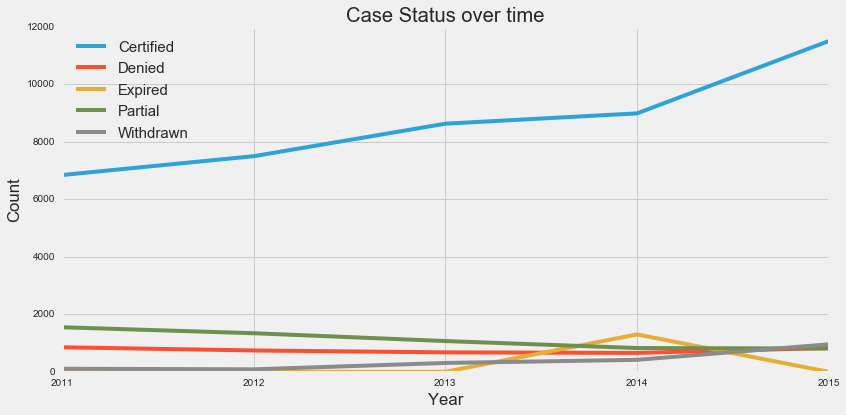

In [90]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((1,1), (0, 0))
ax1.set(xlabel='Year' , ylabel='Count', title='Case Status over time',xticks=(np.arange(2011, 2016, 1.0)))
ax1.ticklabel_format(useOffset=False)
ax1.plot(to_plot.loc[:2015])
ax1.legend(apgp.index.levels[1],loc=0,prop={'size':15})
plt.tight_layout()
plt.show()

# b) How have the number of approved workers changed over time?

In [91]:
fygb = h2visas_df.groupby('fy')
to_plot = fygb['n_requested','n_certified'].aggregate(np.sum)
to_plot

n_requested  n_certified
fy                            
2011     181113.0       160768
2012     184820.0       160633
2013     141117.0       181110
2014     136721.0       210264
2015     271804.0       241355
2016     153330.0       146639

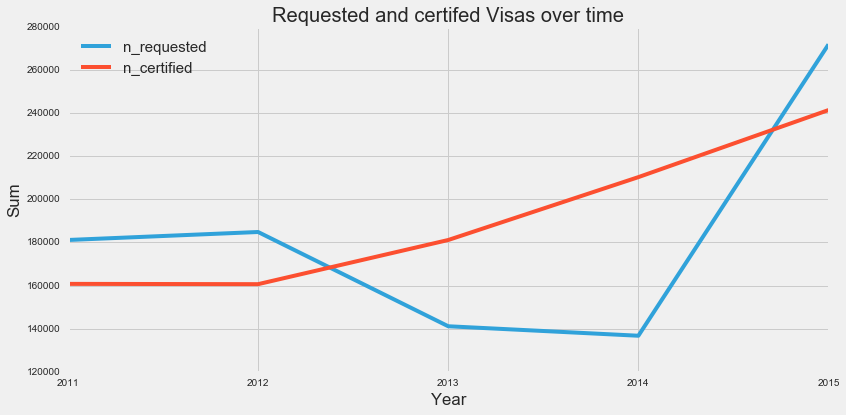

In [92]:
fig = plt.figure(figsize=(12,6))
ax2 = plt.subplot2grid((1,1), (0, 0))
ax2.set(xlabel='Year' , ylabel='Sum', title='Requested and certifed Visas over time',xticks=(np.arange(2011, 2016, 1.0)))
ax2.ticklabel_format(useOffset=False)
ax2.plot(to_plot.index[:-1],to_plot.values[:-1])
ax2.legend(to_plot.columns,loc=0,prop={'size':15})
plt.tight_layout()
plt.show()

# c) Which states request the most visas and how has this changed over time?

Let's check the top 10 states and plot how the applications of these states have changed over time

In [93]:
top10_states = h2visas_df.employer_state.value_counts().index[:11]
top10_states

Index(['TX', 'KY', 'LA', 'NY', 'ID', 'FL', 'MA', 'CO', 'ND', 'PA', 'TN'], dtype='object')

In [94]:
apgp = h2visas_df[h2visas_df["employer_state"].isin(top10_states)].groupby(['fy','employer_state'])['fy'].count()
to_plot = apgp.unstack(level=1,fill_value=0)
to_plot

employer_state   CO   FL   ID    KY   LA   MA   ND   NY   PA   TN    TX
fy                                                                     
2011            377  305  423   598  717  407  264  625  284  192   805
2012            336  339  417   871  740  381  277  582  285  297   810
2013            323  452  448   995  821  401  313  639  306  342   884
2014            396  548  448  1144  933  419  415  674  330  366  1003
2015            439  641  482  1172  999  472  518  739  388  378  1274
2016            343  342  435   425  723  195  393  470  268  194   871

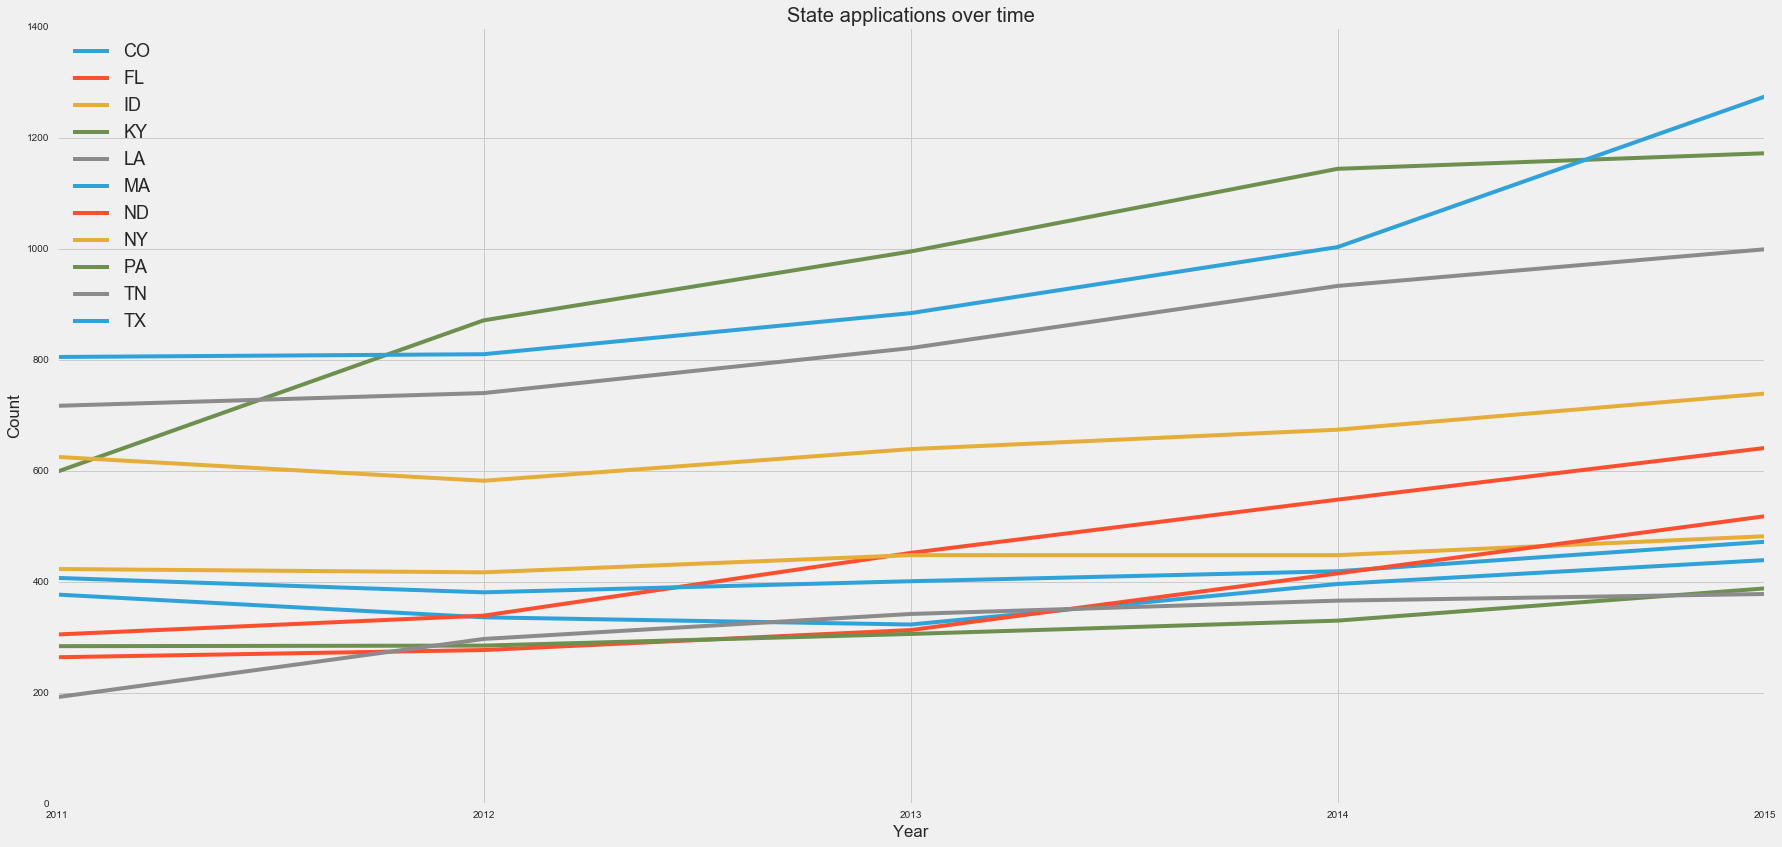

In [95]:
fig = plt.figure(figsize=(25,12))
ax1 = plt.subplot2grid((1,1), (0, 0))
ax1.set(xlabel='Year' , ylabel='Count', title='State applications over time',xticks=(np.arange(2011, 2016, 1.0)))
ax1.ticklabel_format(useOffset=False)
ax1.plot(to_plot.loc[:2015])
ax1.legend(apgp.index.levels[1],loc=0,prop={'size':18})
plt.tight_layout()
plt.show()

# d) Number of VISAS per state (all applications)

In [96]:
# create new column with the key for vincent maps
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
        'CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
        'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky',
        'LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
        'MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National',
        'NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico',
        'NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico',
        'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah',
        'VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont', 'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia',
        'WY': 'Wyoming','AB': 'Alberta','BC': 'British Columbia','MB': 'Manitoba','NB': 'New Brunswick','NL': 'Newfoundland and Labrador',
        'NT': 'Northwest Territories','NS': 'Nova Scotia','NU': 'Nunavut','ON': 'Ontario','PE': 'Prince Edward Island',
        'QC': 'Quebec','SK': 'Saskatchewan','YT': 'Yukon'}


In [98]:
h2visas_df.dropna(subset=["employer_state"], axis=0, inplace=True)
h2visas_df["employer_states_full"] = h2visas_df["employer_state"].map(lambda m: states[m])
state_visas = pd.DataFrame()
state_visas['NAME']=h2visas_df["employer_states_full"].value_counts().index
state_visas['DATA']=h2visas_df["employer_states_full"].value_counts().values

vincent.core.initialize_notebook()
state_topo = "https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/us_states.topo.json"
geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}]

vis = vincent.Map(data=state_visas,geo_data = geo_data, scale = 1000, projection = 'albersUsa',data_bind='DATA' , data_key='NAME',map_key={'states': 'properties.NAME'})
vis.scales[0].type='threshold'
vis.scales[0].domain = list(range(0, 6000,750))
vis.legend(title='Visa applications per US state')

vis.to_json('vega.json')
vis.display()

# e) Number of worksites states

In [100]:
h2visas_df.dropna(subset=["worksite_state"], axis=0, inplace=True)
h2visas_df["working_states_full"] = h2visas_df["worksite_state"].map(lambda m: states[m])
state_visas = pd.DataFrame()
state_visas['NAME']=h2visas_df["working_states_full"].value_counts().index
state_visas['DATA']=h2visas_df["working_states_full"].value_counts().values

vincent.core.initialize_notebook()
state_topo = "https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/us_states.topo.json"
geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}]

vis = vincent.Map(data=state_visas,geo_data = geo_data, scale = 1000, projection = 'albersUsa',data_bind='DATA' , data_key='NAME',map_key={'states': 'properties.NAME'})
vis.scales[0].type='threshold'
vis.scales[0].domain = list(range(0, 6000,750))
vis.legend(title='Visa applications per US state')

vis.to_json('vega.json')
vis.display()